# Words siamese, clustering and method comparison

In [1]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import glob
import numpy as np
# import editdistance
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr, spearmanr, kendalltau, rankdata
# from MulticoreTSNE import MulticoreTSNE as TSNE
import seaborn as sns
from math import ceil
import gzip
import pandas as pd
import time
import math
from sklearn.metrics.pairwise import pairwise_distances
import gzip
import pickle
import re
from sklearn.cluster import DBSCAN, KMeans
from collections import Counter
from sklearn.metrics import silhouette_score
import os

print(plt.style.available)
plt.style.use('seaborn-whitegrid')

['seaborn-dark-palette', 'seaborn-white', 'ggplot', 'seaborn-poster', 'seaborn-muted', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-notebook', 'seaborn-pastel', 'grayscale', 'dark_background', 'bmh', 'seaborn-darkgrid', 'seaborn-bright', 'seaborn-whitegrid', 'seaborn-deep', 'seaborn-dark', 'seaborn-talk', 'seaborn-colorblind', 'classic', 'seaborn-paper']


In [105]:
# df = pd.read_csv("/Users/vdn/Downloads/export_for_rivf_2017_12_14.dsv", sep=";", encoding='cp1251')
# df.head()
del df

In [4]:
def load_embeds(filename):
    seq_vec = []
    emb_vec = []
    with gzip.open(filename) as inpf:
        for line in inpf:
            words = line.strip().split()
            seq_vec.append(words[0].decode())
            emb_vec.append(list(map(float, words[1:])))
    emb_vec = np.array(emb_vec)
    
    return seq_vec, emb_vec

seq_vec, emb_vec = load_embeds("../results/words_lay2/hid128_euc_walln//embeddings_train.final.txt.gz")

In [5]:
def embed_dist(emb_vec, mat_file, metric):
    old_mat = np.load(mat_file)["matrix"]
    inds_vec = np.load(mat_file)["inds10"]
    
    res = []
    for i in range(old_mat.shape[0]):
        res.append((pairwise_distances(old_mat[i].reshape((1, -1)), old_mat[inds_vec[i]], metric=metric)).mean())
    old_dist = np.array(res)
    
    res = []
    for i in range(old_mat.shape[0]):
        res.append((pairwise_distances(emb_vec[i].reshape((1, -1)), emb_vec[inds_vec[i]], metric=metric)).mean())
    new_dist = np.array(res)

    corS = spearmanr(new_dist, old_dist)
    corP = pearsonr(new_dist, old_dist)
    corK = kendalltau(new_dist, old_dist)
    
    return new_dist, old_dist, corS, corP, corK


tmp = embed_dist(emb_vec, "../words_euc/words_euc_all_norm.npz", "euclidean")

In [180]:
# word_dict = {}

# for filename in glob.glob("../results/words_lay2/*"):
#     print(filename, end='\t')
#     seq_vec, emb_vec = load_embeds(filename + "/embeddings_train.final.txt.gz")

#     mat_file = "../words_"
#     if "cos" in filename:
#         mat_file += "cos/words_cos_"
#         metric = "cosine"
#         key = "cos"
#     elif "euc" in filename:
#         mat_file += "euc/words_euc_"
#         metric = "euclidean"
#         key = "euc"
#     else:
#         print("error")
    
#     type_dim = filename[filename.rfind("_")+2:-1].lower()
#     mat_file += type_dim + "_"
#     key += type_dim
    
#     if filename[-1] == "n":
#         mat_file += "norm"
#         key += "norm"
#     elif filename[-1] == "s":
#         mat_file += "sum"
#         key += "sum"
#     elif filename[-1] == "l":
#         mat_file += "log"
#         key += "log"
#     else:
#         print("error")
        
#     mat_file += ".npz"
        
#     tmp = embed_dist(emb_vec, mat_file, metric)
#     print(round(tmp[2][0], 2), round(tmp[4][0], 2))
    
#     re_val = re.search("hid\d*", filename)
#     subkey = filename[re_val.start():re_val.end()]
    
#     if key not in word_dict:
#         word_dict[key] = {}
#     word_dict[key][subkey] = tmp


# with open("word_dict.pkl", "wb") as in_file:
#     pickle.dump(word_dict, in_file)

../results/words_lay2/hid128_cos_w100l	0.84 0.65
cos100log hid128
../results/words_lay2/hid128_cos_w100n	0.75 0.56
cos100norm hid128
../results/words_lay2/hid128_cos_w100s	0.76 0.57
cos100sum hid128
../results/words_lay2/hid128_cos_w10l	0.88 0.7
cos10log hid128
../results/words_lay2/hid128_cos_w10n	0.8 0.6
cos10norm hid128
../results/words_lay2/hid128_cos_w10s	0.81 0.62
cos10sum hid128
../results/words_lay2/hid128_cos_w30l	0.86 0.68
cos30log hid128
../results/words_lay2/hid128_cos_w30n	0.78 0.59
cos30norm hid128
../results/words_lay2/hid128_cos_w30s	0.79 0.6
cos30sum hid128
../results/words_lay2/hid128_cos_wAlll	0.82 0.63
cosalllog hid128
../results/words_lay2/hid128_cos_wAlln	0.74 0.55
cosallnorm hid128
../results/words_lay2/hid128_cos_wAlls	0.74 0.55
cosallsum hid128
../results/words_lay2/hid128_euc_w100l	0.86 0.68
euc100log hid128
../results/words_lay2/hid128_euc_w100n	0.81 0.62
euc100norm hid128
../results/words_lay2/hid128_euc_w100s	0.94 0.79
euc100sum hid128
../results/words_lay2

In [ ]:
word_dict.keys()

In [6]:
# ae_dict = {}

# for filename in glob.glob("../results/ae_words*"):
#     print(filename, end='\t')
#     seq_vec, emb_vec = load_embeds(filename + "/embeddings_train.final.txt.gz")

#     mat_file = "../words_"
#     if "cos" in filename:
#         mat_file += "cos/words_cos_"
#         metric = "cosine"
#         key = "cos"
#     elif "euc" in filename:
#         mat_file += "euc/words_euc_"
#         metric = "euclidean"
#         key = "euc"
#     else:
#         print("error")
    
#     type_dim = filename[filename.rfind("_")+2:-1].lower()
#     mat_file += type_dim + "_"
#     key += type_dim
    
#     if filename[-1] == "n":
#         mat_file += "norm"
#         key += "norm"
#     elif filename[-1] == "s":
#         mat_file += "sum"
#         key += "sum"
#     elif filename[-1] == "l":
#         mat_file += "log"
#         key += "log"
#     else:
#         print("error")
        
#     mat_file += ".npz"
        
#     tmp = embed_dist(emb_vec, mat_file, metric)
#     print(round(tmp[2][0], 2), round(tmp[4][0], 2))
    
#     re_val = re.search("hid\d*", filename)
#     subkey = filename[re_val.start():re_val.end()]
    
#     if key not in ae_dict:
#         ae_dict[key] = {}
#     ae_dict[key][subkey] = tmp


# with open("ae_dict.pkl", "wb") as in_file:
#     pickle.dump(ae_dict, in_file)

../results/ae_words_lay2_lat30_hid128_cos_w100l	0.55 0.39
../results/ae_words_lay2_lat30_hid128_cos_w100n	0.65 0.47
../results/ae_words_lay2_lat30_hid128_cos_w100s	0.53 0.37
../results/ae_words_lay2_lat30_hid128_cos_w10l	0.58 0.41
../results/ae_words_lay2_lat30_hid128_cos_w10n	0.7 0.51
../results/ae_words_lay2_lat30_hid128_cos_w10s	0.66 0.48
../results/ae_words_lay2_lat30_hid128_cos_w30l	0.53 0.37
../results/ae_words_lay2_lat30_hid128_cos_w30n	0.68 0.5
../results/ae_words_lay2_lat30_hid128_cos_w30s	0.57 0.4
../results/ae_words_lay2_lat30_hid128_cos_wAlll	0.63 0.45
../results/ae_words_lay2_lat30_hid128_cos_wAlln	0.67 0.48
../results/ae_words_lay2_lat30_hid128_cos_wAlls	0.5 0.35
../results/ae_words_lay2_lat30_hid32_cos_w100l	0.47 0.33
../results/ae_words_lay2_lat30_hid32_cos_w100n	0.73 0.54
../results/ae_words_lay2_lat30_hid32_cos_w100s	0.53 0.37
../results/ae_words_lay2_lat30_hid32_cos_w10l	0.58 0.41
../results/ae_words_lay2_lat30_hid32_cos_w10n	0.71 0.52
../results/ae_words_lay2_lat30_

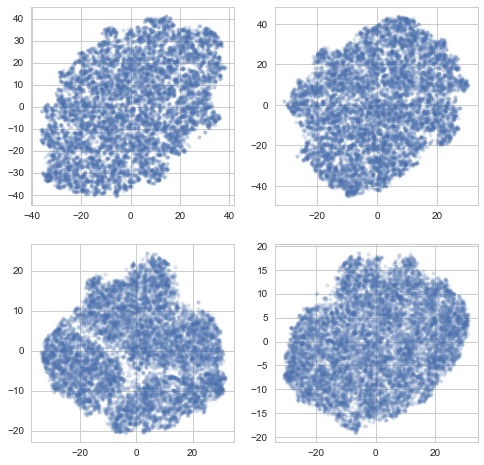

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=2)

fig.set_figwidth(8)
fig.set_figheight(8)

_, emb_vec = load_embeds("../results/ae_words_lay2_lat30_hid128_cos_w100n/embeddings_train.final.txt.gz")
tsne_vec = TSNE(perplexity=30, n_jobs=4).fit_transform(emb_vec)
ax[0][0].scatter(tsne_vec[:,0], tsne_vec[:,1], alpha=.2, s=12)

tsne_vec = TSNE(perplexity=50, n_jobs=4).fit_transform(emb_vec)
ax[0][1].scatter(tsne_vec[:,0], tsne_vec[:,1], alpha=.2, s=12)

tsne_vec = TSNE(perplexity=100, n_jobs=4).fit_transform(emb_vec)
ax[1][0].scatter(tsne_vec[:,0], tsne_vec[:,1], alpha=.2, s=12)

tsne_vec = TSNE(perplexity=130, n_jobs=4).fit_transform(emb_vec)
ax[1][1].scatter(tsne_vec[:,0], tsne_vec[:,1], alpha=.2, s=12)

In [307]:
from sklearn.manifold import TSNE as skTSNE

_, emb_vec = load_embeds("../results/words_lay2/hid256_cos_w100s/embeddings_train.final.txt.gz")
dist_mat = pairwise_distances(emb_vec, metric="cosine", n_jobs=-1)

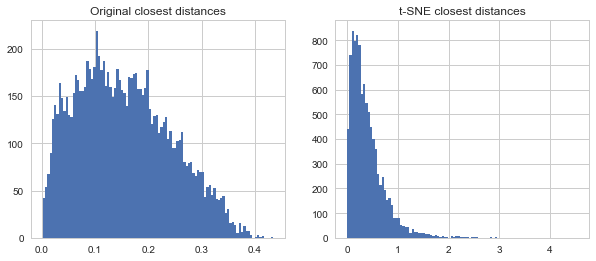

In [311]:
fig, ax = plt.subplots(1, 2)

fig.set_figwidth(10)

tmp = ax[0].hist(np.sort(dist_mat)[:, 1], bins=100)
tmp = ax[1].hist(np.sort(pairwise_distances(tsne_vec1, n_jobs=-1))[:, 1], bins=100)

ax[0].set_title("Original closest distances")
ax[1].set_title("t-SNE closest distances")

In [393]:
with open("tsne_dict.pkl", "rb") as infile:
    tsne_dict = pickle.load(infile)
    
with open("tsne_emb.pkl", "rb") as infile:
    emb_dict = pickle.load(infile)

In [482]:
tsne_dict["cos"].keys()

dict_keys(['../words_cos/words_cos_all_log.npz', '../words_cos/words_cos_100_log.npz', '../words_cos/words_cos_10_sum.npz', '../words_cos/words_cos_all_sum.npz', '../words_cos/words_cos_100_sum.npz', '../words_cos/words_cos_10_log.npz', '../words_cos/words_cos_30_norm.npz', '../words_cos/words_cos_30_log.npz', '../words_cos/words_cos_all_norm.npz', '../words_cos/words_cos_10_norm.npz', '../words_cos/words_cos_30_sum.npz', '../words_cos/words_cos_100_norm.npz'])

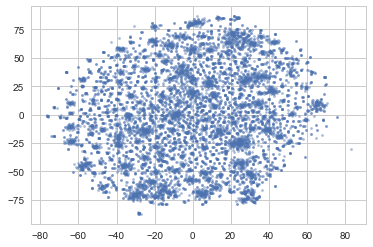

In [484]:
tmp = tsne_dict["cos"]['../words_cos/words_cos_all_norm.npz']
plt.scatter(tmp[:, 0], tmp[:, 1], s=5, alpha=.5)

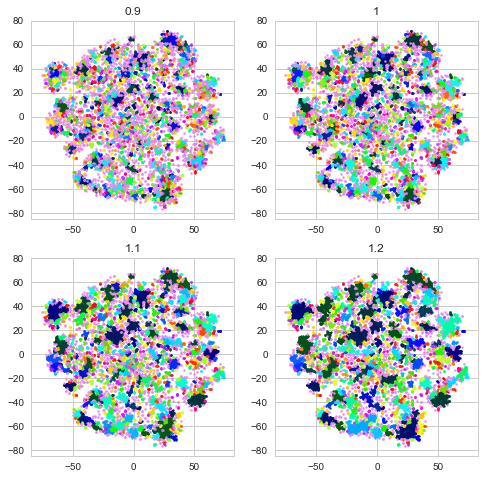

In [414]:
# Клышинскому в первый раз кинул вот такие:
# hid256_cos_w100s

vec_data = emb_dict["../results/words_lay2/hid256_cos_w100n"][1]

eps1 = .9
eps2 = 1
eps3 = 1.1
eps4 = 1.2

# eps1 = 100
# eps2 = 130
# eps3 = 200
# eps4 = 250

res_cl1 = DBSCAN(eps=eps1, n_jobs=4, min_samples=3).fit_predict(vec_data)
res_cl2 = DBSCAN(eps=eps2, n_jobs=4, min_samples=3).fit_predict(vec_data)
res_cl3 = DBSCAN(eps=eps3, n_jobs=4, min_samples=3).fit_predict(vec_data)
res_cl4 = DBSCAN(eps=eps4, n_jobs=4, min_samples=3).fit_predict(vec_data)

# res_cl1 = KMeans(eps1, n_jobs=4).fit_predict(vec_data)
# res_cl2 = KMeans(eps2, n_jobs=4).fit_predict(vec_data)
# res_cl3 = KMeans(eps3, n_jobs=4).fit_predict(vec_data)
# res_cl4 = KMeans(eps4, n_jobs=4).fit_predict(vec_data)

fig, ax = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(8)

plot_clusters(vec_data, res_cl1, ax[0][0], title=eps1)
plot_clusters(vec_data, res_cl2, ax[0][1], title=eps2)
plot_clusters(vec_data, res_cl3, ax[1][0], title=eps3)
plot_clusters(vec_data, res_cl4, ax[1][1], title=eps4)

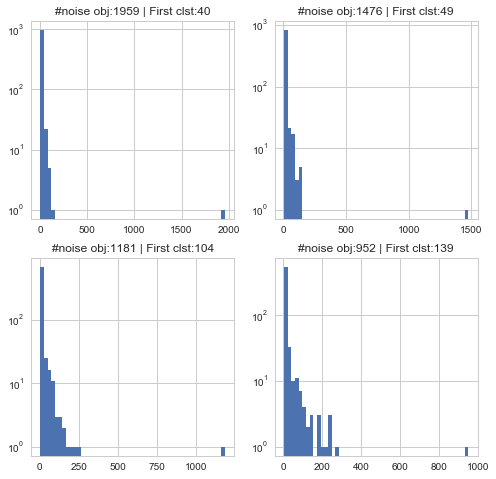

In [415]:
fig, ax = plt.subplots(2, 2)

fig.set_figheight(8)
fig.set_figwidth(8)

def plot_clust_hist(res_cl, ax):
    bars = Counter(res_cl)
    ax.hist(list(bars.values()), bins=50)
    ax.set_yscale('log', nonposy='clip')
    ax.set_title("#noise obj:" + str((res_cl == -1).sum()) + " | First clst:" + str((res_cl == 0).sum()))

plot_clust_hist(res_cl1, ax[0][0])
plot_clust_hist(res_cl2, ax[0][1])
plot_clust_hist(res_cl3, ax[1][0])
plot_clust_hist(res_cl4, ax[1][1])

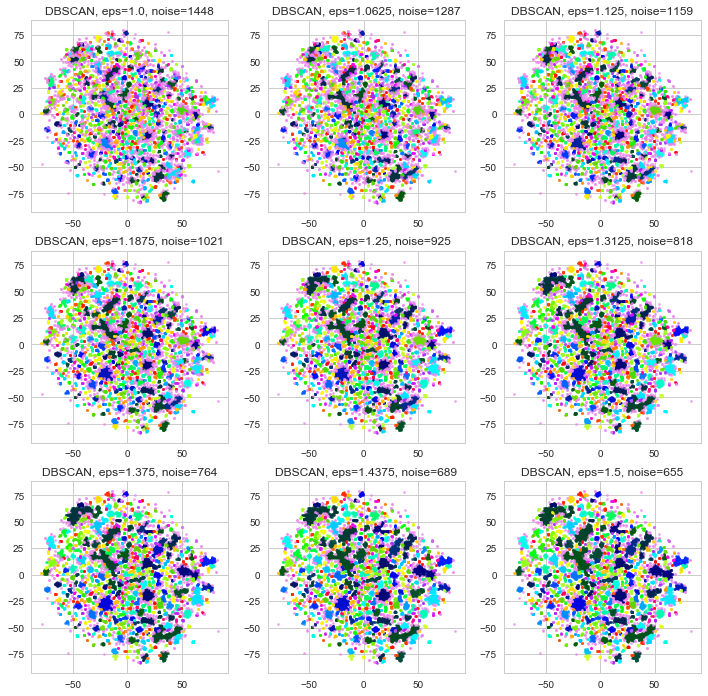

In [485]:
fig, ax = plt.subplots(3,3)
fig.set_figheight(12)
fig.set_figwidth(12)

vec_data = tsne_dict["cos"]["../words_cos/words_cos_10_norm.npz"]
eps_list = np.linspace(1, 1.5, 9)

for i, eps in enumerate(eps_list):
    res_cl = DBSCAN(eps=eps, n_jobs=-1, min_samples=3).fit_predict(vec_data)
    plot_clusters(vec_data, res_cl, ax[i // 3][i % 3], alpha=.8, psize=5, 
                  title="DBSCAN, eps=" + str(eps) + ", noise="+str((res_cl == -1).sum()))

In [495]:
def plot_dbscan(vec_data, eps, key):
    fig, ax = plt.subplots(2,2)
    fig.set_figheight(12)
    fig.set_figwidth(12)

    res_cl = DBSCAN(eps=eps, n_jobs=4, min_samples=3).fit_predict(vec_data)

    ax[0][0].scatter(vec_data[:,0], vec_data[:,1], alpha=.8, s=5, c="black")
    ax[0][0].set_title("t-SNE: " + key)
    plot_clusters(vec_data, res_cl, ax[0][1], alpha=.8, psize=5, title="DBSCAN, eps=" + str(eps) + ", min size=3")
    plot_clust_hist(res_cl, ax[1][0])
    ax[1][0].set_title("Distribution of cluster sizes | noise: " + str((res_cl == -1).sum()) + " objs")
    tmp = ax[1][1].hist(np.sort(pairwise_distances(vec_data, n_jobs=-1))[:, 1], bins=100)
    ax[1][1].axvline(eps, color='red', linestyle='dashed', linewidth=2)
    ax[1][1].set_title("Distribution of closest distances | red line: eps")
    return res_cl


def plot_epsilons(vec_data, eps_list):
    fig, ax = plt.subplots(3,3)
    fig.set_figheight(12)
    fig.set_figwidth(12)

    for i, eps in enumerate(eps_list):
        res_cl = DBSCAN(eps=eps, n_jobs=4, min_samples=3).fit_predict(vec_data)
        plot_clusters(vec_data, res_cl, ax[i // 3][i % 3], alpha=.8, psize=5, 
                      title="DBSCAN, eps=" + str(eps) + ", noise="+str((res_cl == -1).sum()))

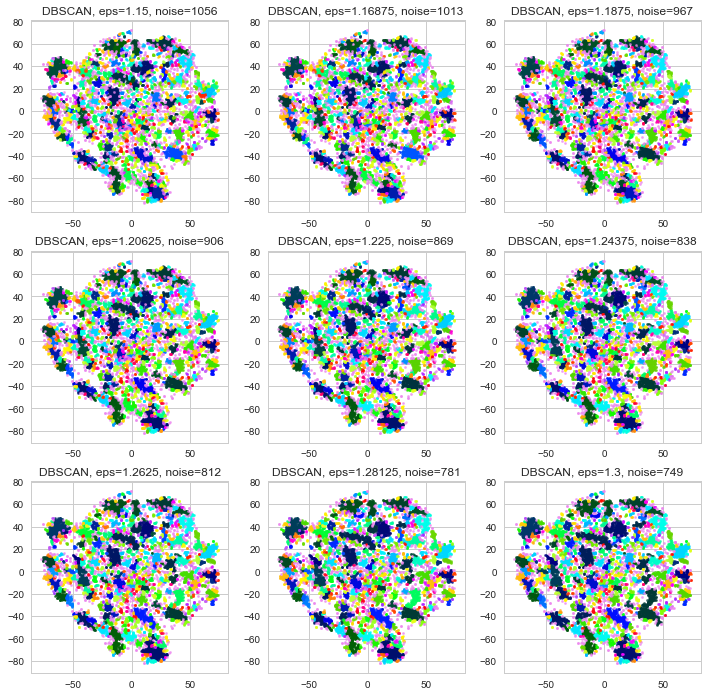

In [542]:
# dict_keys(['../results/words_lay2/hid512_cos_w100n', 
# '../results/words_lay2/hid256_cos_w100n', 
# '../results/words_lay2/lat60_hid512_cos_walls/', 
# '../results/words_lay2/hid512_cos_walln'])
key = '../results/words_lay2/hid512_cos_walln'
vec_data = emb_dict[key][1]
eps_list = np.linspace(1.15, 1.3, 9)

new_folder = "final_clust/" + key.replace(".npz", "")[key.rfind("/")+1:] + "_perp30"
os.makedirs(new_folder, exist_ok=True)

plot_epsilons(vec_data, eps_list)
plt.savefig(new_folder + "/eps.png")

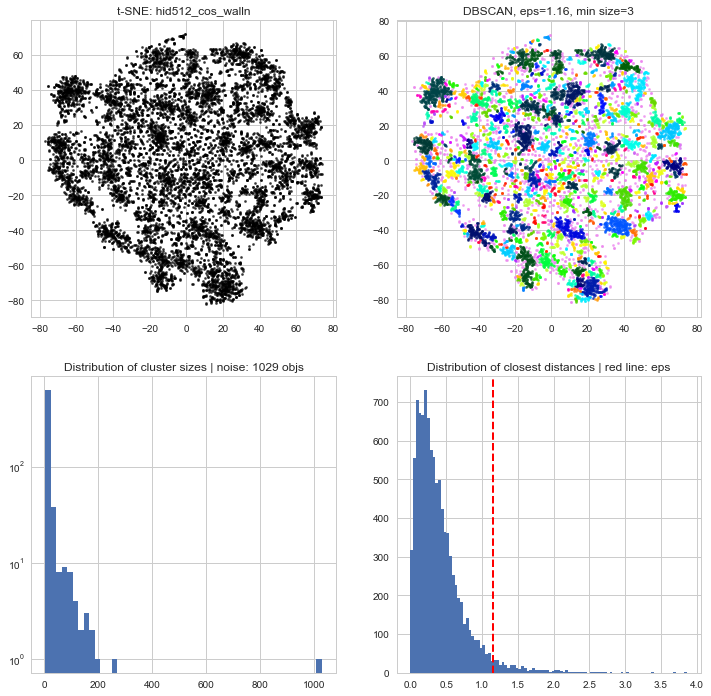

In [543]:
cluster_res = plot_dbscan(vec_data, 1.16, key.replace(".npz", "")[key.rfind("/")+1:])
plt.savefig(new_folder + "/plot.png")

sequences = np.load("../words_euc/words_euc_100_sum.npz")["names"]
with open(new_folder + "/clusters.txt", "w") as outf:
    for clust_ind in set(cluster_res):
        if clust_ind != -1:
            subset = sequences[cluster_res == clust_ind]
            for x in sorted(subset):
                print(x, file=outf)
            print(file=outf)

with open(new_folder + "/noise.txt", "w") as outf:
    for clust_ind in set(cluster_res):
        if clust_ind == -1:
            subset = sequences[cluster_res == clust_ind]
            for x in sorted(subset):
                print(x, file=outf)
            print(file=outf)

/Users/vdn/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


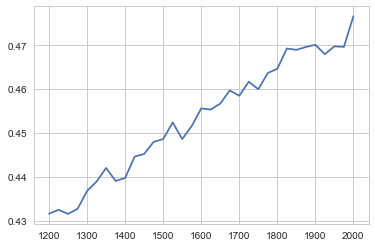

In [335]:
compute_sill(vec_data, 1200, 2000)

In [337]:
sequences = np.load("../words_euc/words_euc_100_sum.npz")["names"]

# sequences = np.array(sequences)
for cluster_res, eps_val in zip([res_cl1, res_cl2, res_cl3, res_cl4], [eps1, eps2, eps3, eps4]):
    with open("clust_dbscan_eps" + str(eps_val).replace(".", "") + ".txt", "w") as outf:
        for clust_ind in set(cluster_res):
            if clust_ind != -1:
                subset = sequences[cluster_res == clust_ind]
    #             if len(subset) < 20:
                for x in sorted(subset):
                    print(x, file=outf)
                print(file=outf)
    #     subset = sequences[cluster_res == -1]
    #     for x in sorted(subset):
    #         print(x, file=outf)
    #     print(file=outf)

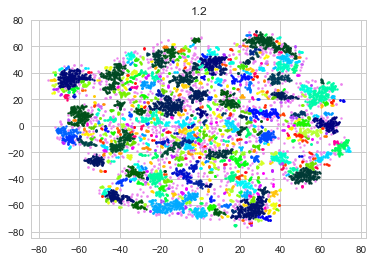

In [444]:
def plot_clusters(res, labels, ax, legend=False, psize=4, alpha=1, title=None):
    labels = np.array(labels)

    for uniq_len in set(labels):
        ax.scatter(res[labels==uniq_len,0], res[labels==uniq_len,1], label=uniq_len, s=psize, alpha=alpha)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1, Paired  
    colorst = [colormap(i) for i in np.linspace(0, .9, len(ax.collections))]

    for t, j1 in enumerate(ax.collections):
        j1.set_color(colorst[t])

    if legend:
        ax.legend()
        
    if title:
        ax.set_title(title)

In [2]:
dist_dict = {}
with open("dist_dict.pkl", "rb") as in_file:
    dist_dict = pickle.load(in_file)
print(sorted(dist_dict.keys()))

word_dict = {}
with open("word_dict.pkl", "rb") as in_file:
    word_dict = pickle.load(in_file)
print(sorted(word_dict.keys()))

ae_dict = {}
with open("ae_dict.pkl", "rb") as in_file:
    ae_dict = pickle.load(in_file)
print(sorted(ae_dict.keys()))

pca_dict = {}
with open("pca_dict.pkl", "rb") as in_file:
    pca_dict = pickle.load(in_file)
    keys = list(pca_dict.keys())
    for key in keys:
        pca_dict["cos" + key[3:]] = pca_dict[key]
print(sorted(pca_dict.keys()))

['cos100log', 'cos100norm', 'cos100sum', 'cos10log', 'cos10norm', 'cos10sum', 'cos30log', 'cos30norm', 'cos30sum', 'cosalllog', 'cosallnorm', 'cosallsum', 'euc100log', 'euc100norm', 'euc100sum', 'euc10log', 'euc10norm', 'euc10sum', 'euc30log', 'euc30norm', 'euc30sum', 'eucalllog', 'eucallnorm', 'eucallsum']
['cos100log', 'cos100norm', 'cos100sum', 'cos10log', 'cos10norm', 'cos10sum', 'cos30log', 'cos30norm', 'cos30sum', 'cosalllog', 'cosallnorm', 'cosallsum', 'euc100log', 'euc100norm', 'euc100sum', 'euc10log', 'euc10norm', 'euc10sum', 'euc30log', 'euc30norm', 'euc30sum', 'eucalllog', 'eucallnorm', 'eucallsum']
['cos100log', 'cos100norm', 'cos100sum', 'cos10log', 'cos10norm', 'cos10sum', 'cos30log', 'cos30norm', 'cos30sum', 'cosalllog', 'cosallnorm', 'cosallsum', 'euc100log', 'euc100norm', 'euc100sum', 'euc10log', 'euc10norm', 'euc10sum', 'euc30log', 'euc30norm', 'euc30sum', 'eucalllog', 'eucallnorm', 'eucallsum']
['cos100log', 'cos100norm', 'cos100sum', 'cos10log', 'cos10norm', 'cos10s

In [81]:
# cols = {"data": []}

# for key in dist_dict:
# #     cols["data"].append(key)
#     for subkey in dist_dict[key]:
#         cols[subkey] = []
#     for subkey in pca_dict[key]:
#         cols[subkey] = []
#     for subkey in word_dict[key]:
#         cols["sn_"+subkey] = []
#     for subkey in ae_dict[key]:
#         cols["ae_"+subkey] = []
        
# all_keys = set(cols.keys())
# all_keys.remove("data")
        
# for key in dist_dict:
#     cols["data"].append(key)
#     keys_heap = all_keys.copy()
    
#     for subkey, val in dist_dict[key].items():
#         cols[subkey].append(round(val[4][0], 3))
#         keys_heap.remove(subkey)
        
#     for subkey, val in pca_dict[key].items():
#         cols[subkey].append(round(val[4][0], 3))
#         keys_heap.remove(subkey)
        
#     for subkey, val in word_dict[key].items():
#         cols["sn_"+subkey].append(round(val[4][0], 3))
#         keys_heap.remove("sn_"+subkey)
        
#     for subkey, val in ae_dict[key].items():
#         cols["ae_"+subkey].append(round(val[4][0], 3))
#         keys_heap.remove("ae_"+subkey)
        
#     for key in keys_heap:
#         cols[key].append(0.0)

# df_res = pd.DataFrame(cols, columns=sorted(list(all_keys)), index=cols["data"])

In [124]:
# for ind in df_res.index.sort_values():
#     print(ind)
#     tmp = df_res.loc[ind, :].sort_values(ascending=False)[:5]
#     print(*[a + "=" + str(round(b,3)) for (a,b) in tmp.iteritems()], sep="\t")
#     print()

cos100log
sn_hid512_lat60=0.669	sn_hid256=0.658	sn_hid128=0.654	sn_hid512=0.642	sn_hid32=0.614

cos100norm
sn_hid512_lat60=0.645	sn_hid128=0.564	sn_hid256=0.553	sn_hid512=0.544	sn_hid32=0.543

cos100sum
pca50=0.766	pca100=0.766	pca10=0.766	pca30=0.765	sn_hid512_lat60=0.656

cos10log
sn_hid128=0.697	sn_hid32=0.648	lle=0.463	mds=0.462	ae_hid32=0.412

cos10norm
sn_hid32=0.607	sn_hid128=0.604	ae_hid32=0.519	ae_hid128=0.511	lle=0.506

cos10sum
sn_hid128=0.616	sn_hid32=0.597	lle=0.536	ae_hid128=0.476	ae_hid32=0.469

cos30log
sn_hid128=0.681	sn_hid32=0.63	mds=0.501	lle=0.45	ae_hid32=0.373

cos30norm
sn_hid128=0.589	sn_hid32=0.574	ae_hid32=0.519	lle=0.507	ae_hid128=0.496

cos30sum
sn_hid128=0.598	sn_hid32=0.544	lle=0.491	pca10=0.486	pca30=0.483

cosalllog
pca50=0.891	pca30=0.891	pca100=0.891	pca10=0.891	sn_hid512_lat60=0.666

cosallnorm
sn_hid512_lat60=0.632	sn_hid128=0.55	sn_hid512=0.544	ae_hid32=0.526	sn_hid32=0.52

cosallsum
pca100=0.774	pca50=0.773	pca30=0.773	pca10=0.771	sn_hid512_lat60=0

In [28]:
def plot_corr_plots(name, dist_tuple, ax1, ax2, c="black", s=2, alpha=.5):
    new_dist, old_dist, _, _, _ = dist_tuple
    
#     corS = spearmanr(new_dist, old_dist)
    corP = pearsonr(new_dist, old_dist)
    corK = kendalltau(new_dist, old_dist)
    
    ax1.set_title(name)
    ax2.set_title("".join(map(lambda x: str(x), ["P=", round(corP[0], 2), "; K=", round(corK[0], 2)])))
    ax1.scatter(old_dist, new_dist, s=s, c=c, alpha=alpha)
    ax2.scatter(rankdata(old_dist), rankdata(new_dist), s=s, c=c, alpha=alpha)

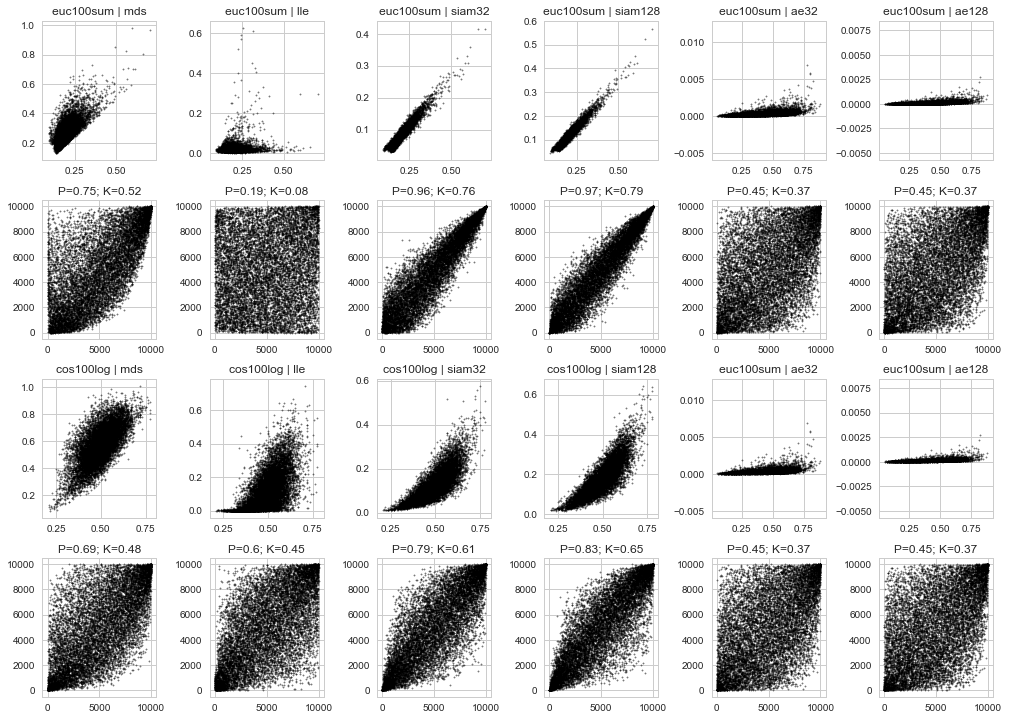

In [29]:
fig, ax = plt.subplots(ncols=6, nrows=4)
fig.tight_layout(pad=.2)
fig.set_figwidth(14)
fig.set_figheight(10)

key1 = "euc100sum"
key2 = "cos100log"

plot_corr_plots(key1 + " | mds", dist_dict[key1]["mds"], ax[0][0], ax[1][0])
plot_corr_plots(key1 + " | lle", dist_dict[key1]["lle"], ax[0][1], ax[1][1])
plot_corr_plots(key1 + " | siam32", word_dict[key1]["hid32"], ax[0][2], ax[1][2])
plot_corr_plots(key1 + " | siam128", word_dict[key1]["hid128"], ax[0][3], ax[1][3])
plot_corr_plots(key1 + " | ae32", ae_dict[key1]["hid32"], ax[0][4], ax[1][4])
plot_corr_plots(key1 + " | ae128", ae_dict[key1]["hid128"], ax[0][5], ax[1][5])

plot_corr_plots(key2 + " | mds", dist_dict[key2]["mds"], ax[2][0], ax[3][0])
plot_corr_plots(key2 + " | lle", dist_dict[key2]["lle"], ax[2][1], ax[3][1])
plot_corr_plots(key2 + " | siam32", word_dict[key2]["hid32"], ax[2][2], ax[3][2])
plot_corr_plots(key2 + " | siam128", word_dict[key2]["hid128"], ax[2][3], ax[3][3])
plot_corr_plots(key1 + " | ae32", ae_dict[key1]["hid32"], ax[2][4], ax[3][4])
plot_corr_plots(key1 + " | ae128", ae_dict[key1]["hid128"], ax[2][5], ax[3][5])

In [4]:
def plot_rank_plots(name, dist_tuple, ax, c="black", s=2, alpha=.5):
    new_dist, old_dist, _, _, _ = dist_tuple
    
#     corS = spearmanr(new_dist, old_dist)
    corP = pearsonr(new_dist, old_dist)
    corK = kendalltau(new_dist, old_dist)
    
    ax.set_title(name + " " + "".join(map(lambda x: str(x), ["K=", round(corK[0], 2)])))
    ax.scatter(rankdata(old_dist), rankdata(new_dist), s=s, c=c, alpha=alpha)
    
    ax.set_xlim((-500, 10500))
    ax.set_ylim((-500, 10500))

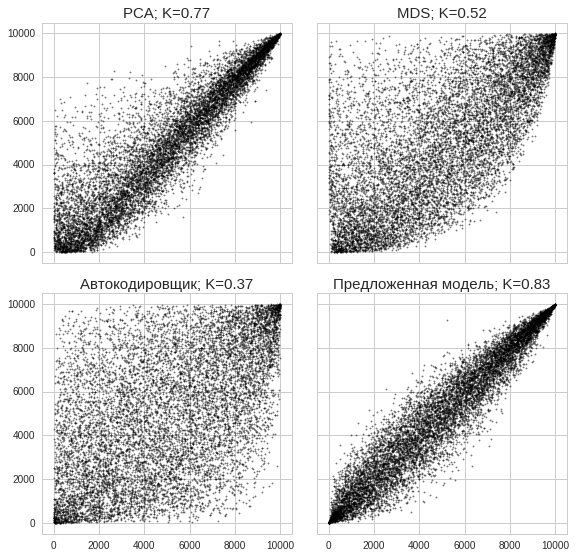

In [5]:
fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
fig.tight_layout(pad=1)
fig.set_figwidth(8)
fig.set_figheight(8)

key1 = "euc100sum"

font_size = 15

plot_rank_plots("MDS;", dist_dict[key1]["mds"], ax[0][1])
# plot_rank_plots("LLE;", dist_dict[key1]["lle"], ax[0][1])
plot_rank_plots("PCA;", pca_dict[key1]["pca30"], ax[0][0])
plot_rank_plots("Автокодировщик;", ae_dict[key1]["hid128"], ax[1][0])
plot_rank_plots("Предложенная модель;", word_dict[key1]["hid256"], ax[1][1])
ax[0][0].title.set_fontsize(font_size)
ax[0][1].title.set_fontsize(font_size)
ax[1][0].title.set_fontsize(font_size)
ax[1][1].title.set_fontsize(font_size)

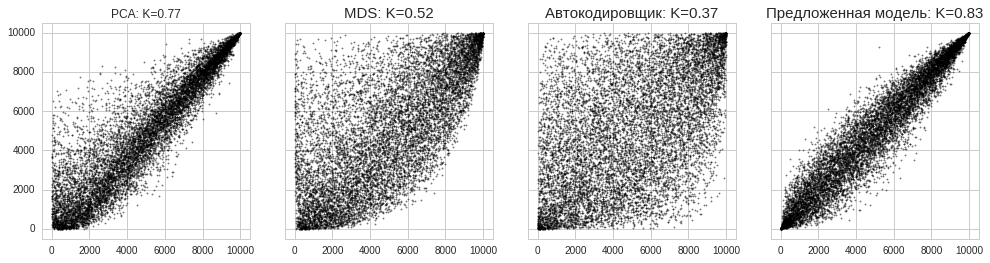

In [150]:
fig, ax = plt.subplots(ncols=4, nrows=1, sharex=True, sharey=True)
fig.tight_layout(pad=.15)
fig.subplots_adjust(top=.9, bottom=.15)

fig.set_figwidth(14)
fig.set_figheight(4)

key1 = "euc100sum"

font_size = 15
plot_rank_plots("MDS:", dist_dict[key1]["mds"], ax[1])
ax[0].title.set_fontsize(font_size)
# plot_rank_plots("LLE:", dist_dict[key1]["lle"], ax[1])
# ax[1].title.set_fontsize(font_size)
plot_rank_plots("PCA:", pca_dict[key1]["pca10"], ax[0])
ax[1].title.set_fontsize(font_size)
plot_rank_plots("Автокодировщик:", ae_dict[key1]["hid128"], ax[2])
ax[2].title.set_fontsize(font_size)
plot_rank_plots("Предложенная модель:", word_dict[key1]["hid256"], ax[3])
ax[3].title.set_fontsize(font_size)

fig.savefig("experiment_3_1/exp_3_1_compare.png", dpi=fig.dpi)

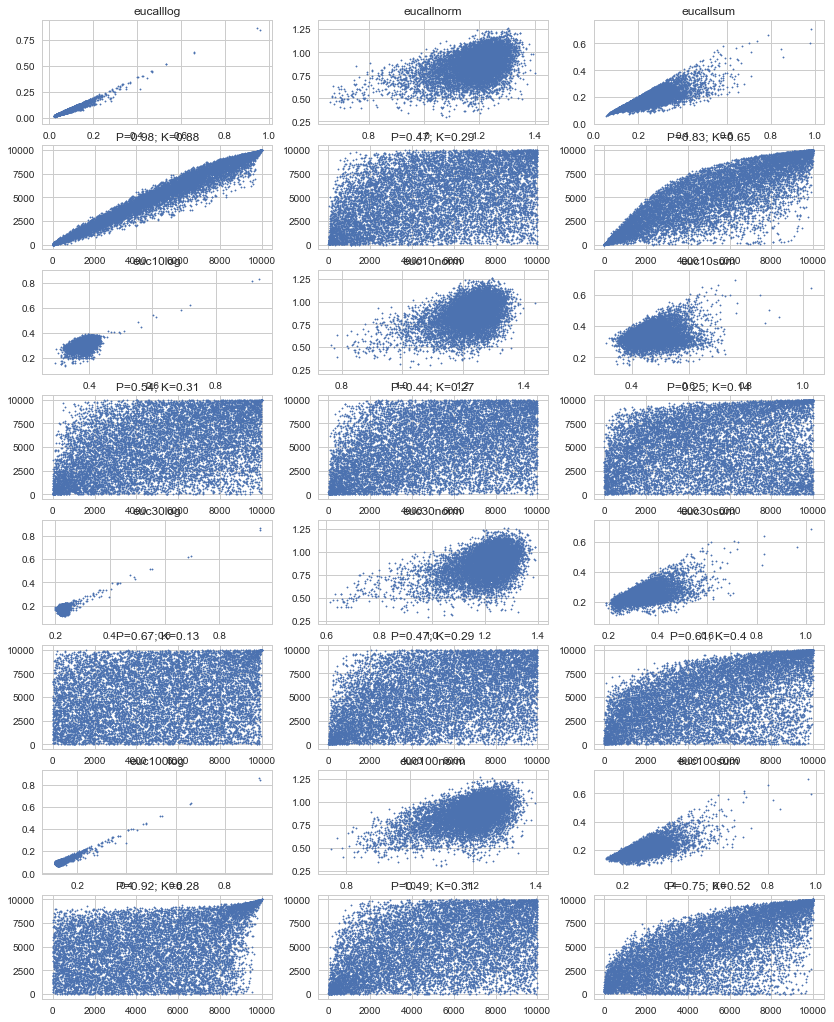

In [39]:
key_list = ["eucalllog", "eucallnorm", "eucallsum"]

fig, ax = plt.subplots(ncols=len(key_list), nrows=8)

for i, key in enumerate(key_list):
    plot_corr_plots(key, dist_dict[key]["mds"], ax[0][i], ax[1][i])
    

key_list = ["euc10log", "euc10norm", "euc10sum"]
for i, key in enumerate(key_list):
    plot_corr_plots(key, dist_dict[key]["mds"], ax[2][i], ax[3][i])
    
    
key_list = ["euc30log", "euc30norm", "euc30sum"]
for i, key in enumerate(key_list):
    plot_corr_plots(key, dist_dict[key]["mds"], ax[4][i], ax[5][i])
    
    
key_list = ["euc100log", "euc100norm", "euc100sum"]
for i, key in enumerate(key_list):
    plot_corr_plots(key, dist_dict[key]["mds"], ax[6][i], ax[7][i])
    

fig.set_figwidth(14)
fig.set_figheight(18)